In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from helperClasses.tennis_ball_detection_pytorch import BallDetectionPytorch
import cProfile
import snakeviz as sv
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
svo_path = '../../data/HD1080_SN35520970_11-03-24.svo'
ballDetection = BallDetectionPytorch(svo_path)

In [12]:
ballDetection.calculate_background(svo_path, 'left', 100, 30)
ballDetection.save_background('left')

100%|██████████| 3000/3000 [00:55<00:00, 53.88it/s]


In [11]:
ballDetection.load_background('left')

FileNotFoundError: [Errno 2] No such file or directory: 'median_background_l.pt'

In [4]:
result = ballDetection.get_ball_by_frame(500, 1500, return_video=True)

100%|██████████| 1000/1000 [02:10<00:00,  7.68it/s]


In [5]:
#Tensor to numpy
numpyresult = result.cpu().numpy()
numpyresult

array([[ 569, 1270],
       [ 650, 1892],
       [ 655, 1642],
       ...,
       [ 576,  327],
       [ 533,  947],
       [ 561, 1238]], dtype=int64)

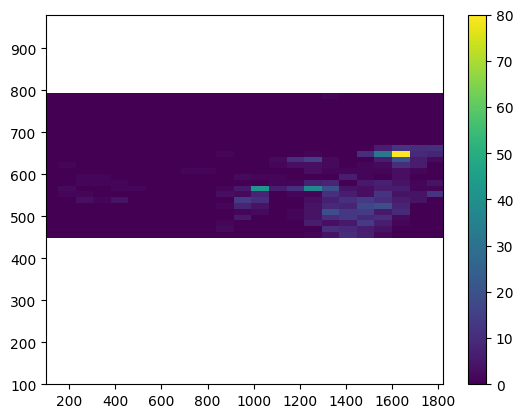

In [10]:
plt.hist2d(numpyresult[:,1], numpyresult[:,0], bins=25)
plt.xlim(100, 1820)
plt.ylim(100, 980)
plt.colorbar()
plt.show()

## Profiling

In [2]:
%load_ext snakeviz

In [0]:
svo_path = '../../data/HD1080_SN35520970_11-03-24.svo'
ballDetection = BallDetectionPytorch(svo_path)

ballDetection.get_background(svo_path, 10, 30)

%snakeviz ballDetection.get_ball_by_frame(500, 1100, True)

## Versuch Ballerkennung Links

In [3]:
ballDetection.calculate_background(svo_path, 'right', 100, 30)
ballDetection.save_background('right')

100%|██████████| 3000/3000 [00:57<00:00, 52.33it/s]


In [4]:
ballDetection.load_background('right')

tensor([], device='cuda:0')

In [16]:
result = ballDetection.get_ball_by_frame(500, 1500, 'right', return_video=False)

100%|██████████| 1000/1000 [00:51<00:00, 19.57it/s]


tensor([[ 550, 1082],
        [ 575, 1576],
        [ 586, 1582],
        ...,
        [ 561, 1261],
        [ 560, 1195],
        [ 560, 1209]], device='cuda:0')

In [ ]:
numpyresult = result.cpu().numpy()
numpyresult

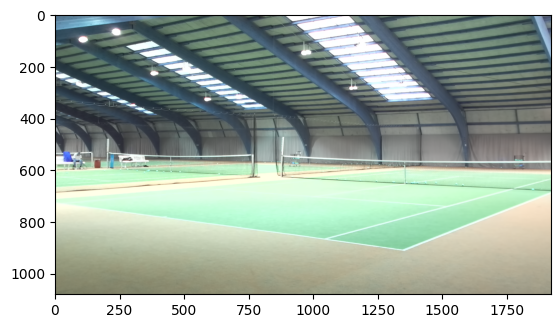

In [9]:
plt.imshow(ballDetection.median_background_r.cpu().numpy().astype(np.uint8))
plt.show()